In [26]:
import pandas as pd
import nltk
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [27]:
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mazen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
datSen = pd.read_csv('test.csv')
SenInAn = SentimentIntensityAnalyzer()
# List of countries
countries = ["United States", "Germany", "Italy", "Spain", "United Kingdom"]

# Generate random entries and add as a new column
random_countries = [random.choice(countries) for _ in range(datSen.shape[0])]
datSen["Country"] = random_countries
datSen.to_csv('test_modified.csv', index=False)

datSen

,id,tweet,Country
0,31963,#studiolife #aislife #requires #passion #dedic...,Italy
1,31964,@user #white #supremacists want everyone to s...,United Kingdom
2,31965,safe ways to heal your #acne!! #altwaystohe...,United States
3,31966,is the hp and the cursed child book up for res...,Italy
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",Germany
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,Spain
17193,49156,feeling like a mermaid ð #hairflip #neverre...,United States
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,United Kingdom
17195,49158,"happy, at work conference: right mindset leads...",United States


In [29]:
def preprocess_text(tweet):
    #Tokenizes the text into words
    tokens = word_tokenize(tweet.lower())
        # Removes stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    
    # Re-joins the tokens into a string
    tweet = ' '.join(tokens)
    return tweet

In [30]:
# Preprocess the text in the dataset
datSen['tweet'] = datSen['tweet'].apply(preprocess_text)

In [31]:
# Define a function to get the sentiment score of a sentence
def get_sentiment_score(sentence):
    return SenInAn.polarity_scores(sentence)['compound']
# Apply the get_sentiment_score function to the text in the dataset
datSen['sentiment_score'] = datSen['tweet'].apply(get_sentiment_score)

In [32]:
# Define a function to classify the sentiment based on the sentiment score
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [33]:
# Apply the classify_sentiment function to the sentiment score in the dataset
datSen['sentiment'] = datSen['sentiment_score'].apply(classify_sentiment)

# Save the results to a new CSV file
datSen.to_csv('sentiment_analysis_results.csv', index=False)

# Get Sentiment Score Mean
Mean_Sentiment_Score = datSen['sentiment_score'].mean()

# Get Sentiment Score Mean of Germany 
Mean_Sentiment_Score_Germany = datSen[datSen['Country']=='Germany']['sentiment_score'].mean()

# Get Sentiment Score Mean of Italy
Mean_Sentiment_Score_Italy = datSen[datSen['Country']=='Italy']['sentiment_score'].mean()

# Get Sentiment Score Mean of Spain
Mean_Sentiment_Score_Spain = datSen[datSen['Country']=='Spain']['sentiment_score'].mean()

# Get Sentiment Score Mean of United Kingdom
Mean_Sentiment_Score_United_Kingdom = datSen[datSen['Country']=='United Kingdom']['sentiment_score'].mean()

# Get Sentiment Score Mean of United States
Mean_Sentiment_Score_United_States = datSen[datSen['Country']=='United States']['sentiment_score'].mean()


#Filtering datSen that we already have by country and reviews and getting their count
grouped_By_DatSen = datSen.groupby(['Country','sentiment']).size().reset_index(name='count')

grouped_By_DatSen_Positive = grouped_By_DatSen[grouped_By_DatSen['sentiment']=='positive']
grouped_By_DatSen_Negative = grouped_By_DatSen[grouped_By_DatSen['sentiment']=='negative']
grouped_By_DatSen_Neutral = grouped_By_DatSen[grouped_By_DatSen['sentiment']=='neutral']

grouped_By_DatSen



,Country,sentiment,count
0,Germany,negative,686
1,Germany,neutral,925
2,Germany,positive,1796
3,Italy,negative,635
4,Italy,neutral,989
5,Italy,positive,1825
6,Spain,negative,710
7,Spain,neutral,956
8,Spain,positive,1786
9,United Kingdom,negative,673


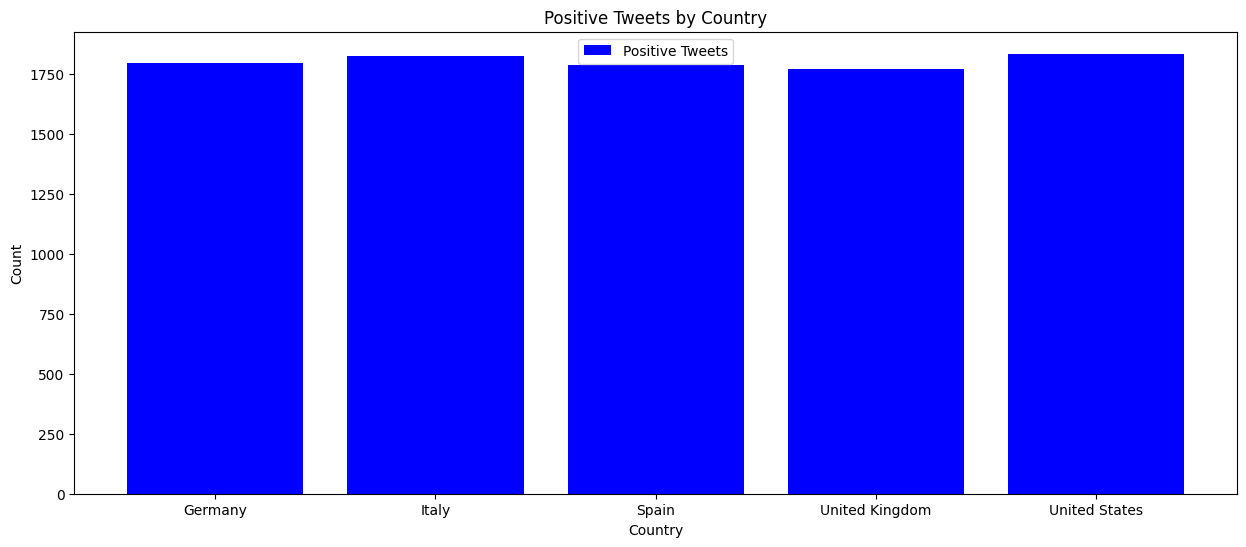

In [34]:
plt.figure(plt.figure(figsize=(15,6)))
plt.bar(grouped_By_DatSen_Positive['Country'], grouped_By_DatSen_Positive['count'], width=0.8, color='blue')
plt.title('Positive Tweets by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(['Positive Tweets'])
plt.show()

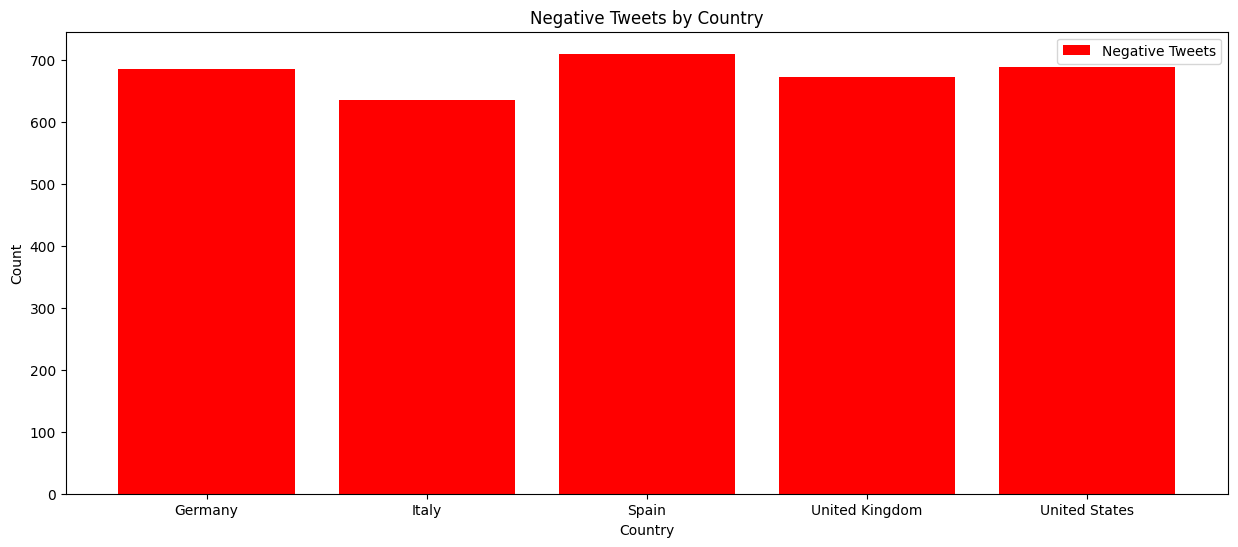

In [35]:
plt.figure(plt.figure(figsize=(15,6)))
plt.bar(grouped_By_DatSen_Negative['Country'], grouped_By_DatSen_Negative['count'], width=0.8, color='red')
plt.title('Negative Tweets by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(['Negative Tweets'])
plt.show()

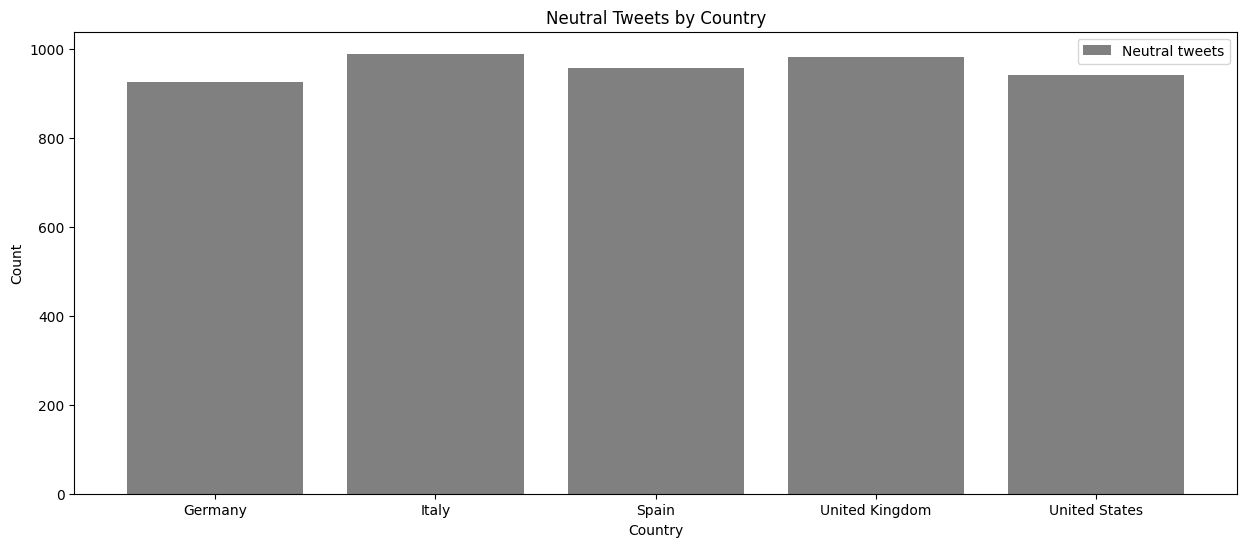

In [36]:
plt.figure(plt.figure(figsize=(15,6)))
plt.bar(grouped_By_DatSen_Neutral['Country'], grouped_By_DatSen_Neutral['count'], width=0.8, color='gray')
plt.title('Neutral Tweets by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(['Neutral tweets'])
plt.show()

In [37]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of All Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()

In [38]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score_Germany,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of Germany's Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()

In [39]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score_Italy,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of Italy's Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()

In [40]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score_Spain,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of Spain's Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()

In [41]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score_United_States,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of United States' Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()

In [42]:
fig = go.Figure(go.Indicator(
    domain={'x': [0, 1], 'y': [0, 1]},
    
    value= Mean_Sentiment_Score_United_Kingdom,
    mode="gauge+number",
    title = {'text': "Mean of Sentiment Score of United Kingdom's Tweets", 'font': {'size': 24, 'color': "black", 'family': "Times New Roman"}},
    gauge={'axis': {'range': [-1, 1], 'tickwidth': 2, 'tickcolor': "gray"},
            'bar': {'color': "black"},
            'bordercolor': "gray",
            'borderwidth': 2,
            'bgcolor': "white",
           'steps': [
               {'range': [-1, -0.5], 'color': "red"},
               {'range': [-0.5, 0], 'color': "orange"},
               {'range': [0, 0.5], 'color': "yellow"},
               {'range': [0.5, 1], 'color': "green"}],
           }))
fig.update_layout(font = {'color': "gray", 'family': "Times New Roman", 'size':18})

fig.show()